In [46]:
import numpy as np
import torch
from torch.autograd import Variable
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [47]:
path_to_pydeformetrica = '/Users/maxime.louis/Documents/pydeformetrica'
sys.path.append(os.path.join(path_to_pydeformetrica, '../'))
from pydeformetrica.src.in_out.xml_parameters import XmlParameters
from pydeformetrica.src.in_out.dataset_functions import create_template_metadata
from pydeformetrica.src.in_out.deformable_object_reader import DeformableObjectReader
from pydeformetrica.src.core.model_tools.attachments.multi_object_attachment import MultiObjectAttachment
from pydeformetrica.src.support.kernels.kernel_functions import create_kernel
from pydeformetrica.src.support.utilities.general_settings import Settings
from src.in_out.array_readers_and_writers import *

In [48]:
#path_to_atlas = '/Users/maxime.louis/Documents/metric_learning/simulation_images/deep_PET_slice'
#path_to_atlas = '/Users/maxime.louis/Documents/metric_learning/synthetic_image/deep_synthetic'
#path_to_atlas = '/Users/maxime.louis/Documents/metric_learning/synthetic_scores/deep_scores'
path_experiments = '/Users/maxime.louis/Documents/metric_learning/MRIs/' 
#path_to_atlas = ['/Users/maxime.louis/Documents/metric_learning/MRIs/fold_' + str(i) for i in range(10)]
#path_to_atlas = ['/Users/maxime.louis/Documents/metric_learning/MRIs/fold_128_' + str(i) for i in range(10)]
sources_number = [2,4,6,8,10,12,14,16,18,20,22]
path_to_atlas = ['/Users/maxime.louis/Documents/metric_learning/MRIs/fold_128_0_' + str(i) + '_sources' for i in sources_number]

path_to_output = [os.path.join(elt, 'output') for elt in path_to_atlas]
#optimization_parameters_xml_path = os.path.join(path_to_atlas, 'optimization_parameters.xml')
optimization_parameters_xml_path = os.path.join(path_to_atlas[0], '../optimization_parameters.xml')
model_name = 'LongitudinalMetricModel'

fold_to_plot = 3



initialized_model_xml_path = os.path.join(path_to_atlas[fold_to_plot], 'model_after_initialization.xml')

#path_to_output = os.path.join(path_to_atlas, 'registration')
#optimization_parameters_xml_path = os.path.join(path_to_atlas, 'optimization_parameters_registration.xml')
#model_name = 'LongitudinalRegistration'
#initialized_model_xml_path = os.path.join(path_to_atlas, 'model_registration.xml')

dataset_xml_path = os.path.join(path_to_atlas[fold_to_plot], 'data_set_train.xml') 
#watch out for this... 
#don't display other than this fold

xml_parameters = XmlParameters()
xml_parameters.read_all_xmls(initialized_model_xml_path, dataset_xml_path, optimization_parameters_xml_path)
number_of_sources = xml_parameters.number_of_sources

s = ''
for elt in xml_parameters.subject_ids:
    s += ',' + elt
print(s)

>> No initial CP spacing given: using diffeo kernel width of 0
>> Warning: context has already been set [ in xml_parameters ]. Ignoring.
>> State will be saved in file output/pydef_state.p
,1007,1010,1015,101,1032,1033,1043,1054,1066,1070,1073,1077,1078,1080,108,1097,1098,1106,1116,1117,111,1121,1123,1126,1130,1135,1138,1148,1186,1213,1217,1224,1225,123,1240,1247,1249,1255,1265,1268,126,1271,1282,128,1292,1295,1299,1311,1315,1318,1326,1331,1346,1350,1387,1389,1393,1394,1398,1406,1407,1412,141,1423,1425,1427,142,155,160,179,187,195,204,2087,2130,214,217,2195,222,223,2248,227,230,2316,231,2381,2398,2403,240,241,243,249,256,258,269,276,289,292,30,314,325,326,331,344,361,362,376,389,390,394,4015,4030,4035,4041,4042,4057,4058,406,4079,408,4094,4096,4102,4157,4162,4171,4188,4189,41,4203,423,4240,4243,4245,424,4250,4262,4263,42,4303,4324,4331,434,4363,4366,4385,4402,4406,4414,4415,442,4432,4458,4462,448,4502,4506,4507,450,4515,4521,4530,4542,4582,4584,4595,4596,4597,461,4623,4659,4661,4668,46

In [88]:
trajectories_parameters = []
for elt in path_to_output:
    path_to_trajectory = os.path.join(elt, model_name + '__EstimatedParameters__Trajectory.npy')
    trajectories_parameters.append(np.load(path_to_trajectory)[()])
for key, val in trajectories_parameters[0].items():
    print(key, val.shape)

p0 (201, 3)
reference_time (201, 1)
v0 (201, 3)
onset_age_variance (201, 1)
log_acceleration_variance (201, 1)
noise_variance (201, 1)
modulation_matrix (201, 6)
metric_parameters (201, 14105)


# 1. Print parameters trajectory


In [89]:
# onset_age_variance:
#onset_age_variances = trajectory_all_parameters['onset_age_variance']
#plt.plot(onset_age_variances, label='onset_age_variance')
#plt.legend()
#plt.show()

# reference_time.
#reference_times = trajectory_all_parameters['reference_time']
#plt.plot(reference_times)
#plt.ylabel("Reference time")
#plt.xlabel("Iterations")
#plt.legend()
#plt.show()

In [90]:
# neural network parameters
#nn_parameters = trajectory_all_parameters['metric_parameters']
#print('Number of nn parameters:', len(nn_parameters[0]))
#for i in range(20):
#    plt.plot(nn_parameters[:, i])
#plt.ylabel("Neural network weights")
#plt.xlabel("Iterations")
#plt.show()
    

Final noise variance: 0.0132577953839
Final noise variance: 0.0123751971507
Final noise variance: 0.0118521286847
Final noise variance: 0.0113265571183
Final noise variance: 0.0110973747997
Final noise variance: 0.0105057790136
Final noise variance: 0.00998724474303
Final noise variance: 0.00984730458755
Final noise variance: 0.00923608661064
Final noise variance: 0.00961626648203
Final noise variance: 0.00967972643637
Final noise variances: 0.0107983146373 +/- 0.00123404252693


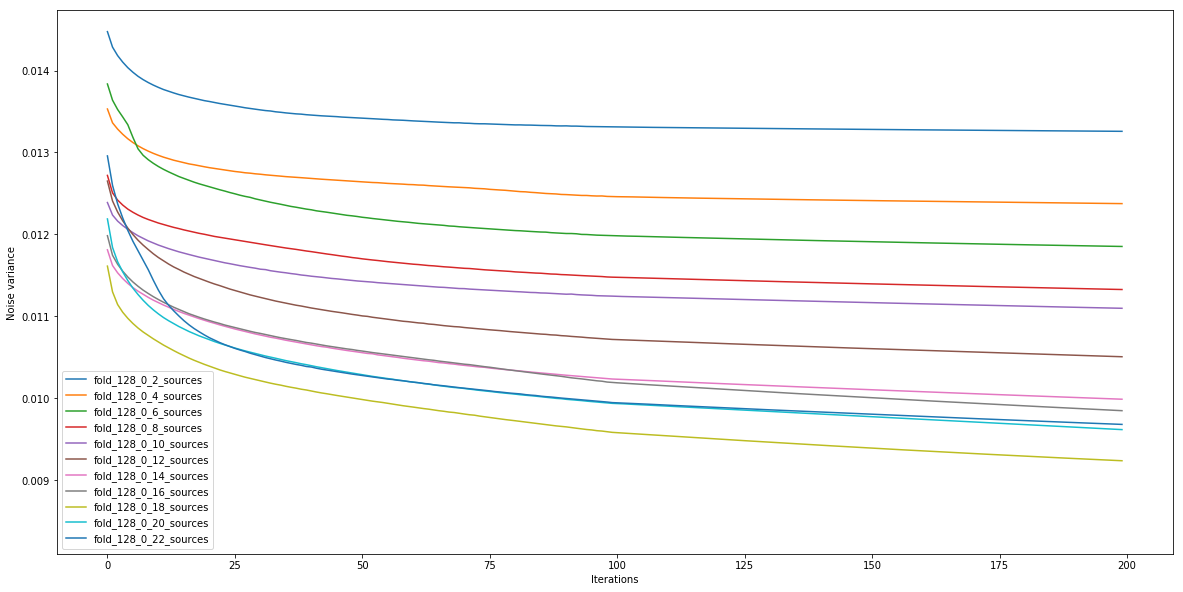

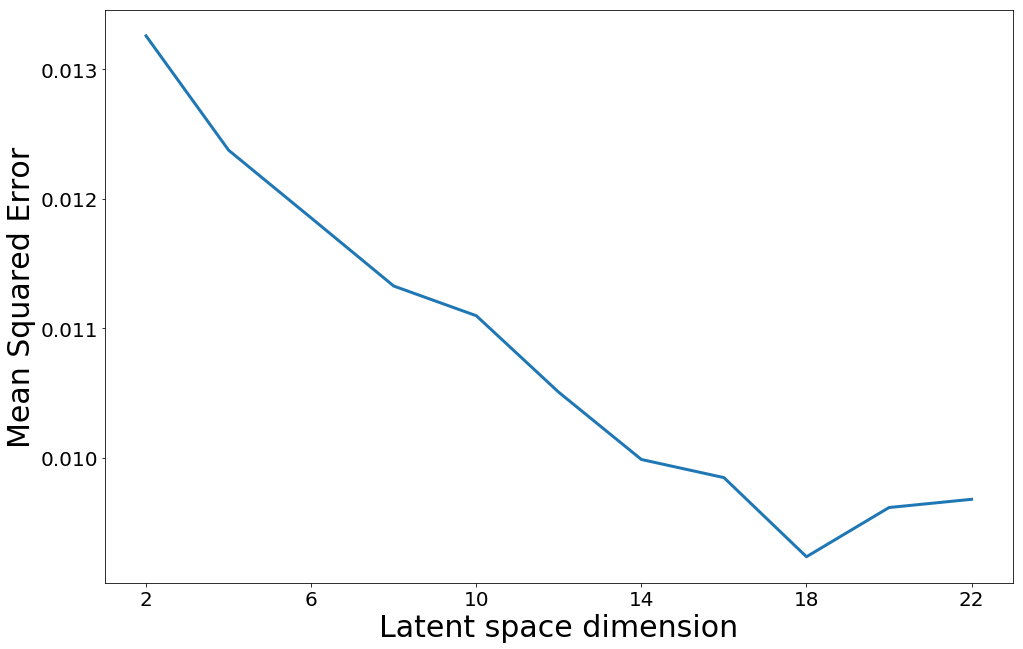

In [101]:
# noise variance 
final_noise_variances = []
plt.figure(figsize=(20,10))
for i, traj_param in enumerate(trajectories_parameters):
    noise_variances = traj_param['noise_variance']
    plt.plot(noise_variances[1:], label=os.path.basename(path_to_atlas[i]))
    print('Final noise variance:', noise_variances[-1][0])
    final_noise_variances.append(noise_variances[-1][0])
print('Final noise variances:', np.mean(final_noise_variances), '+/-', np.std(final_noise_variances))
plt.ylabel("Noise variance")
plt.xlabel("Iterations")
plt.ylim(0.0081)
#plt.xlim(0.,75)
plt.legend()
plt.show()

# getting last nonzero values
last_non_zeros = []
for traj_param in trajectories_parameters:
    non_zero_val = [elt for elt in traj_param['noise_variance'] if elt >0][-1]
    last_non_zeros.append(non_zero_val)
plt.figure(figsize=(14,9))
plt.plot(sources_number, last_non_zeros, linewidth=3)
plt.ylabel('Mean Squared Error', fontsize=30)
plt.xlabel('Latent space dimension', fontsize=30)
plt.tight_layout()

plt.xticks([2, 6, 10, 14, 18, 22], ['2', '6', '10', '14', '18', '22'])
plt.yticks([0.01, 0.011, 0.012, 0.013], ['0.010', '0.011', '0.012', '0.013'])
plt.tick_params(axis='both', which='major', labelsize=20)

plt.savefig(os.path.join(path_experiments, 'figures', 'noise_variances_vs_sources.pdf'), bbox_inches='tight', pad_inches=0)
plt.show()

In [99]:
# Looking at the residuals for all folds
residuals_train_list = []
residuals_train_registration_list = []
residuals_test_list = []
for i, elt in enumerate(path_to_output):
    residuals_train = np.loadtxt(os.path.join(elt, 'LongitudinalMetricModel_residuals.txt'))
    residuals_train_list.append(np.mean(residuals_train))
    #print('Mean train residual (with last sample)', np.mean(residuals_train))

    residuals_train_registration = np.loadtxt(os.path.join(path_to_atlas[i], 'registration_train', 'LongitudinalRegistration_residuals.txt'))
    #print('Mean train residual (with registration)', np.mean(residuals_train_registration))
    residuals_train_registration_list.append(np.mean(residuals_train_registration))
    
    residuals_test = np.loadtxt(os.path.join(path_to_atlas[i], 'registration_test', 'LongitudinalRegistration_residuals.txt'))
    residuals_test_list.append(np.mean(residuals_test))
    #print('Mean test residual', np.mean(residuals_test))
    
print('Train residual:', np.mean(residuals_train_list), '+/-', np.std(residuals_train_list))
print('Train residual (registration):', np.mean(residuals_train_registration_list), '+/-', np.std(residuals_train_registration_list))
print('Test residual:', np.mean(residuals_test_list), '+/-', np.std(residuals_test_list))

Train residual: 0.0793713460208 +/- 0.0035542819068
Train residual (registration): 0.0795465102233 +/- 0.00351850014064
Test residual: 0.0860163581267 +/- 0.00178268236422


# 2 Absolute times

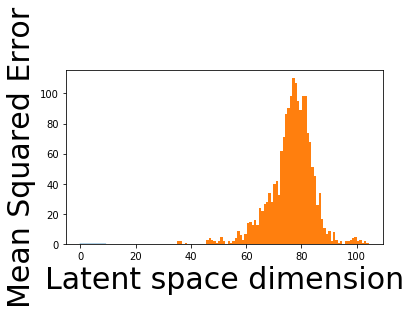

In [37]:
# Absolute times Plotting the histogram for the last observation
abs_times = np.loadtxt(os.path.join(path_to_output[fold_to_plot], model_name + "_absolute_times.txt"))
plt.hist(abs_times, bins=80)
plt.show()

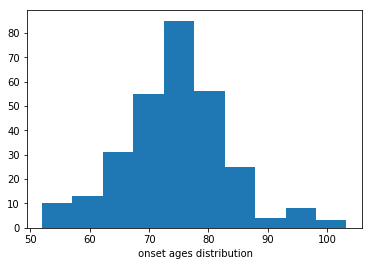

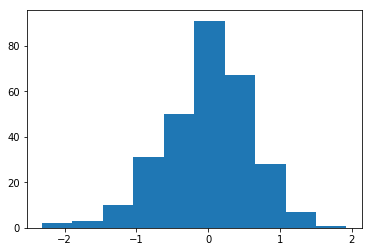

In [38]:
# Last realisations for the alphas and onset ages
log_accelerations = np.loadtxt(os.path.join(path_to_output[fold_to_plot], model_name + "_log_accelerations.txt"))
onset_ages = np.loadtxt(os.path.join(path_to_output[fold_to_plot], model_name + "_onset_ages.txt"))
#info = np.loadtxt('/Users/maxime.louis/Documents/metric_learning/synthetic_image/info_subjectssynthetic_dataset.txt')
#log_accelerations_truth = np.log(info[:,0])
#onset_ages_truth = info[:,1]

#ax1 = plt.subplot(211)
plt.hist(onset_ages, bins=10)
plt.xlabel(' onset ages distribution')
#ax2 = plt.subplot(212, sharex=ax1)
#plt.hist(onset_ages_truth, bins=10)
plt.show()

#ax1 = plt.subplot(211)
plt.hist(log_accelerations, bins=10)
#ax2 = plt.subplot(212, sharex=ax1)
#plt.hist(log_accelerations_truth, bins=10)
plt.show()



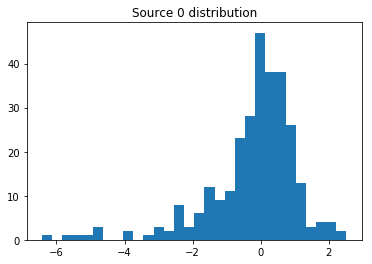

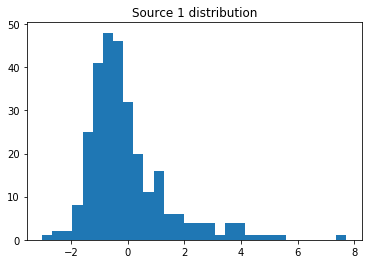

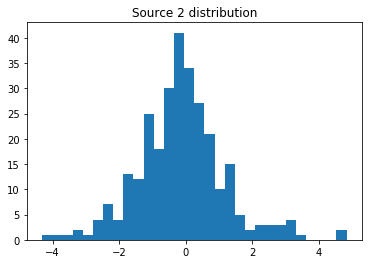

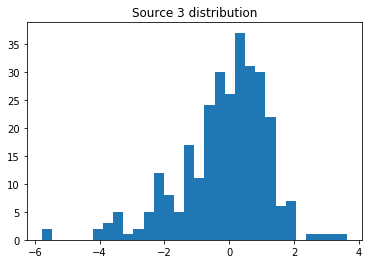

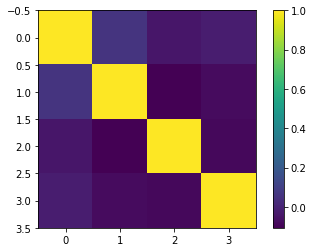

In [39]:
sources = np.loadtxt(os.path.join(path_to_output[fold_to_plot], model_name + "_sources.txt"))
if len(sources.shape) == 1:
    sources = sources.reshape(len(sources), 1)
number_of_sources = len(sources[0])
for i in range(len(sources[0])):
    plt.hist(sources[:, i], bins=30)
    plt.title("Source "+str(i)+" distribution")
    plt.show()
    
corr_matrix = np.corrcoef(sources.T)
plt.imshow(corr_matrix)
plt.colorbar()
plt.show()

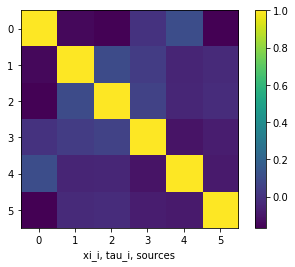

In [40]:
l = [log_accelerations, onset_ages]
for i in range(len(sources[0])):
    l.append(sources[:,i])
corr_matrix = np.corrcoef(l)
plt.imshow(corr_matrix)
plt.xlabel('xi_i, tau_i, sources')
plt.colorbar()
plt.show()

# 3 Plotting some images


In [85]:
from PIL import Image
def load_images(l):
    return [np.load(elt) for elt in l]

def load_image_trajectory(folder):
    #image_paths = [elt for elt in os.listdir(folder) if elt.find('.png') >= 0]
    image_paths = [elt for elt in os.listdir(folder) if elt.find('.npy') >= 0]
    image_paths = sorted(image_paths, key=(lambda x: float(x[x.find('_t__')+4 : x.find('.npy')])))
    pad = int(len(image_paths)/3)
    image_paths = image_paths[pad:]
    image_paths = image_paths[:-pad]
    to_keep = 7
    image_paths_aux = []
    if len(image_paths) > to_keep:
        stride = int(len(image_paths)/to_keep)
        for i in range(to_keep):
            image_paths_aux.append(image_paths[i*stride])
        image_paths = image_paths_aux
    #print(image_paths)
    return load_images([os.path.join(folder, elt) for elt in image_paths])
    #return [np.array(Image.open(os.path.join(folder, elt)))/255 for elt in image_paths]
    
def plot_images(images, name=None):
    images = np.array(images)
    if len(images.shape)==3:
        images = images.reshape((1,)+images.shape)
    a,b,c,d = images.shape
    # We reshape to get a single image
    images = np.concatenate(np.concatenate(images, axis=1), axis=1)
    plt.figure(figsize=(10*b, 10*a), frameon=False)
    plt.tight_layout()
    plt.imshow(images, cmap='gray')
    #print(round(np.min(images), 2), round(np.max(images), 2))
    #ticks=[round(np.min(images), 2), round(np.max(images), 2)], 
    colorbar = plt.colorbar(shrink=0.8, orientation='vertical', pad=0.02, aspect=10, format='%1.1f')
    colorbar.ax.tick_params(labelsize=30)
    plt.axis('off')
    if name is not None:
        if not os.path.isdir(os.path.join(path_experiments, 'figures')):
            os.mkdir(os.path.join(path_experiments, 'figures'))
        plt.savefig(os.path.join(path_experiments, 'figures', os.path.basename(path_to_atlas[fold_to_plot]) + '_' + name), bbox_inches='tight', pad_inches=0)
    plt.show()
    

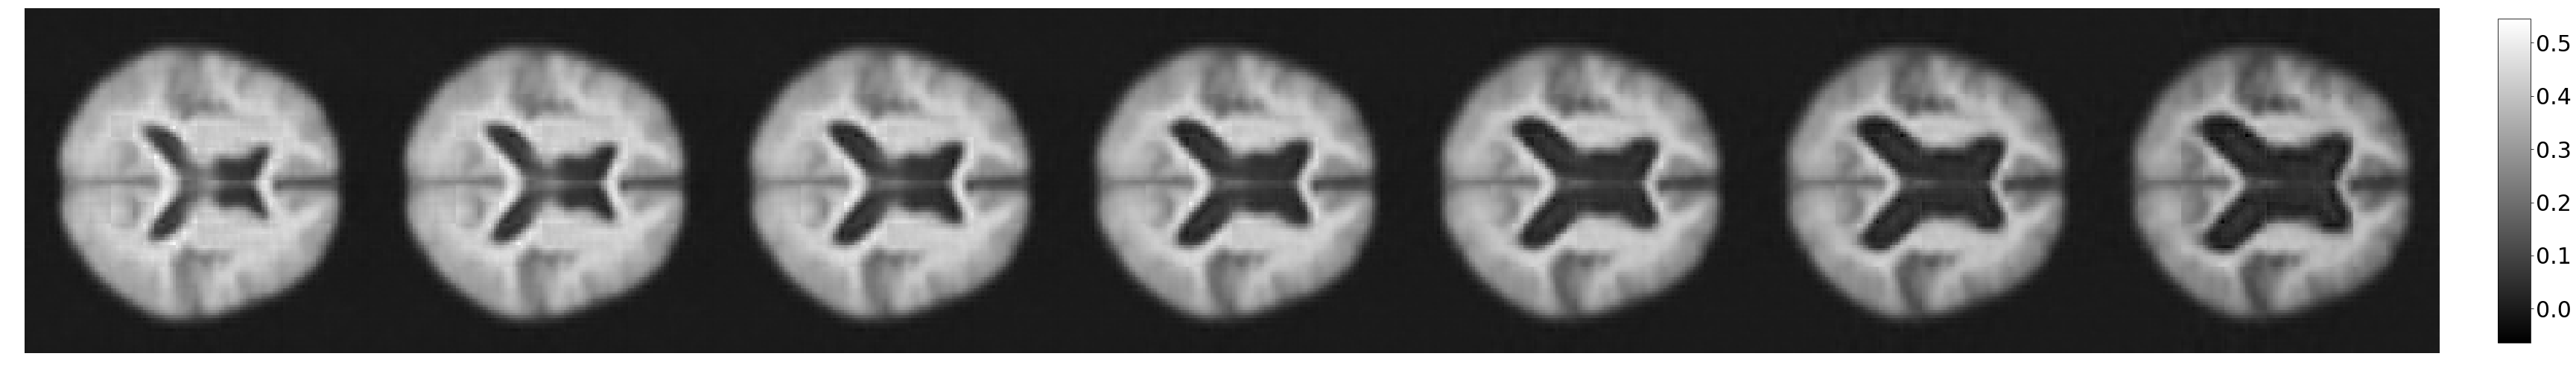

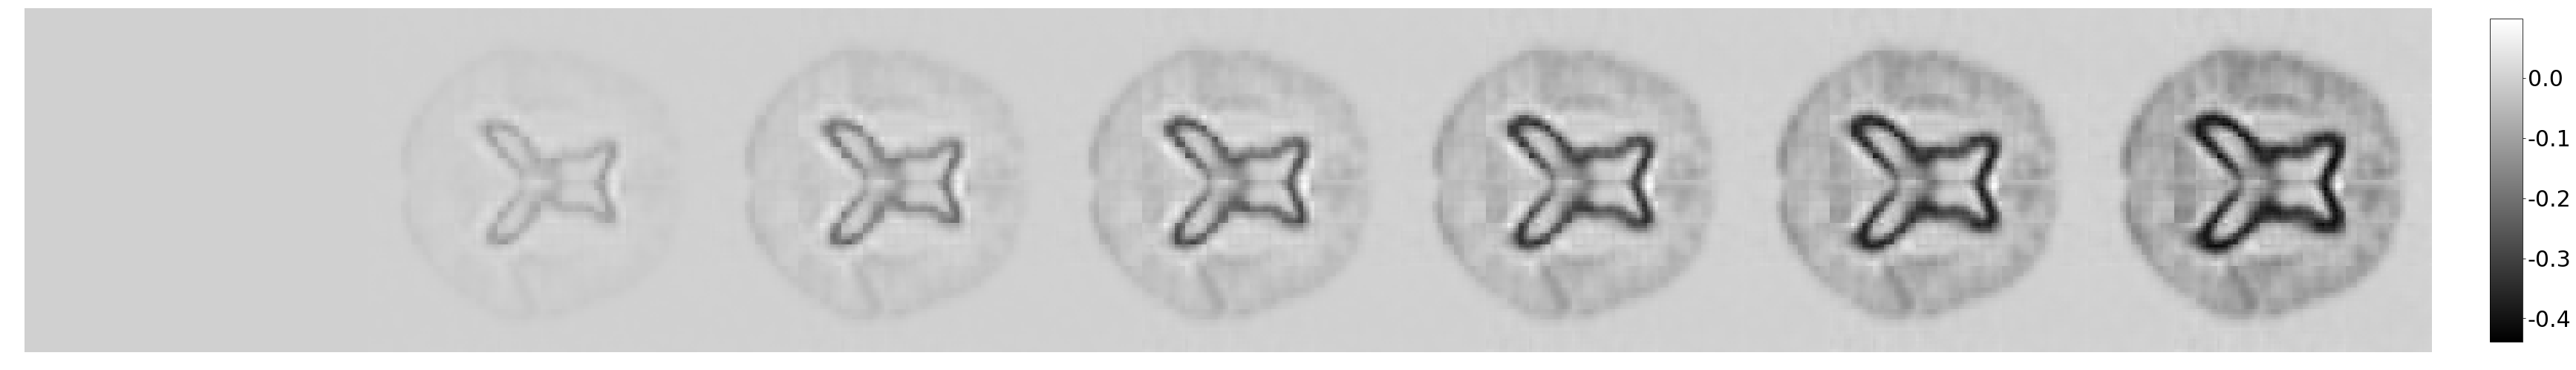

In [86]:
# Geodesic trajectory
geodesic_folder = os.path.join(path_to_output[fold_to_plot], 'geodesic_trajectory')
geodesic_images = load_image_trajectory(geodesic_folder)
plot_images(geodesic_images, name='reference_geodesic.pdf')

diff = [elt - geodesic_images[0] for elt in geodesic_images]
plot_images(diff, 'differences.pdf')

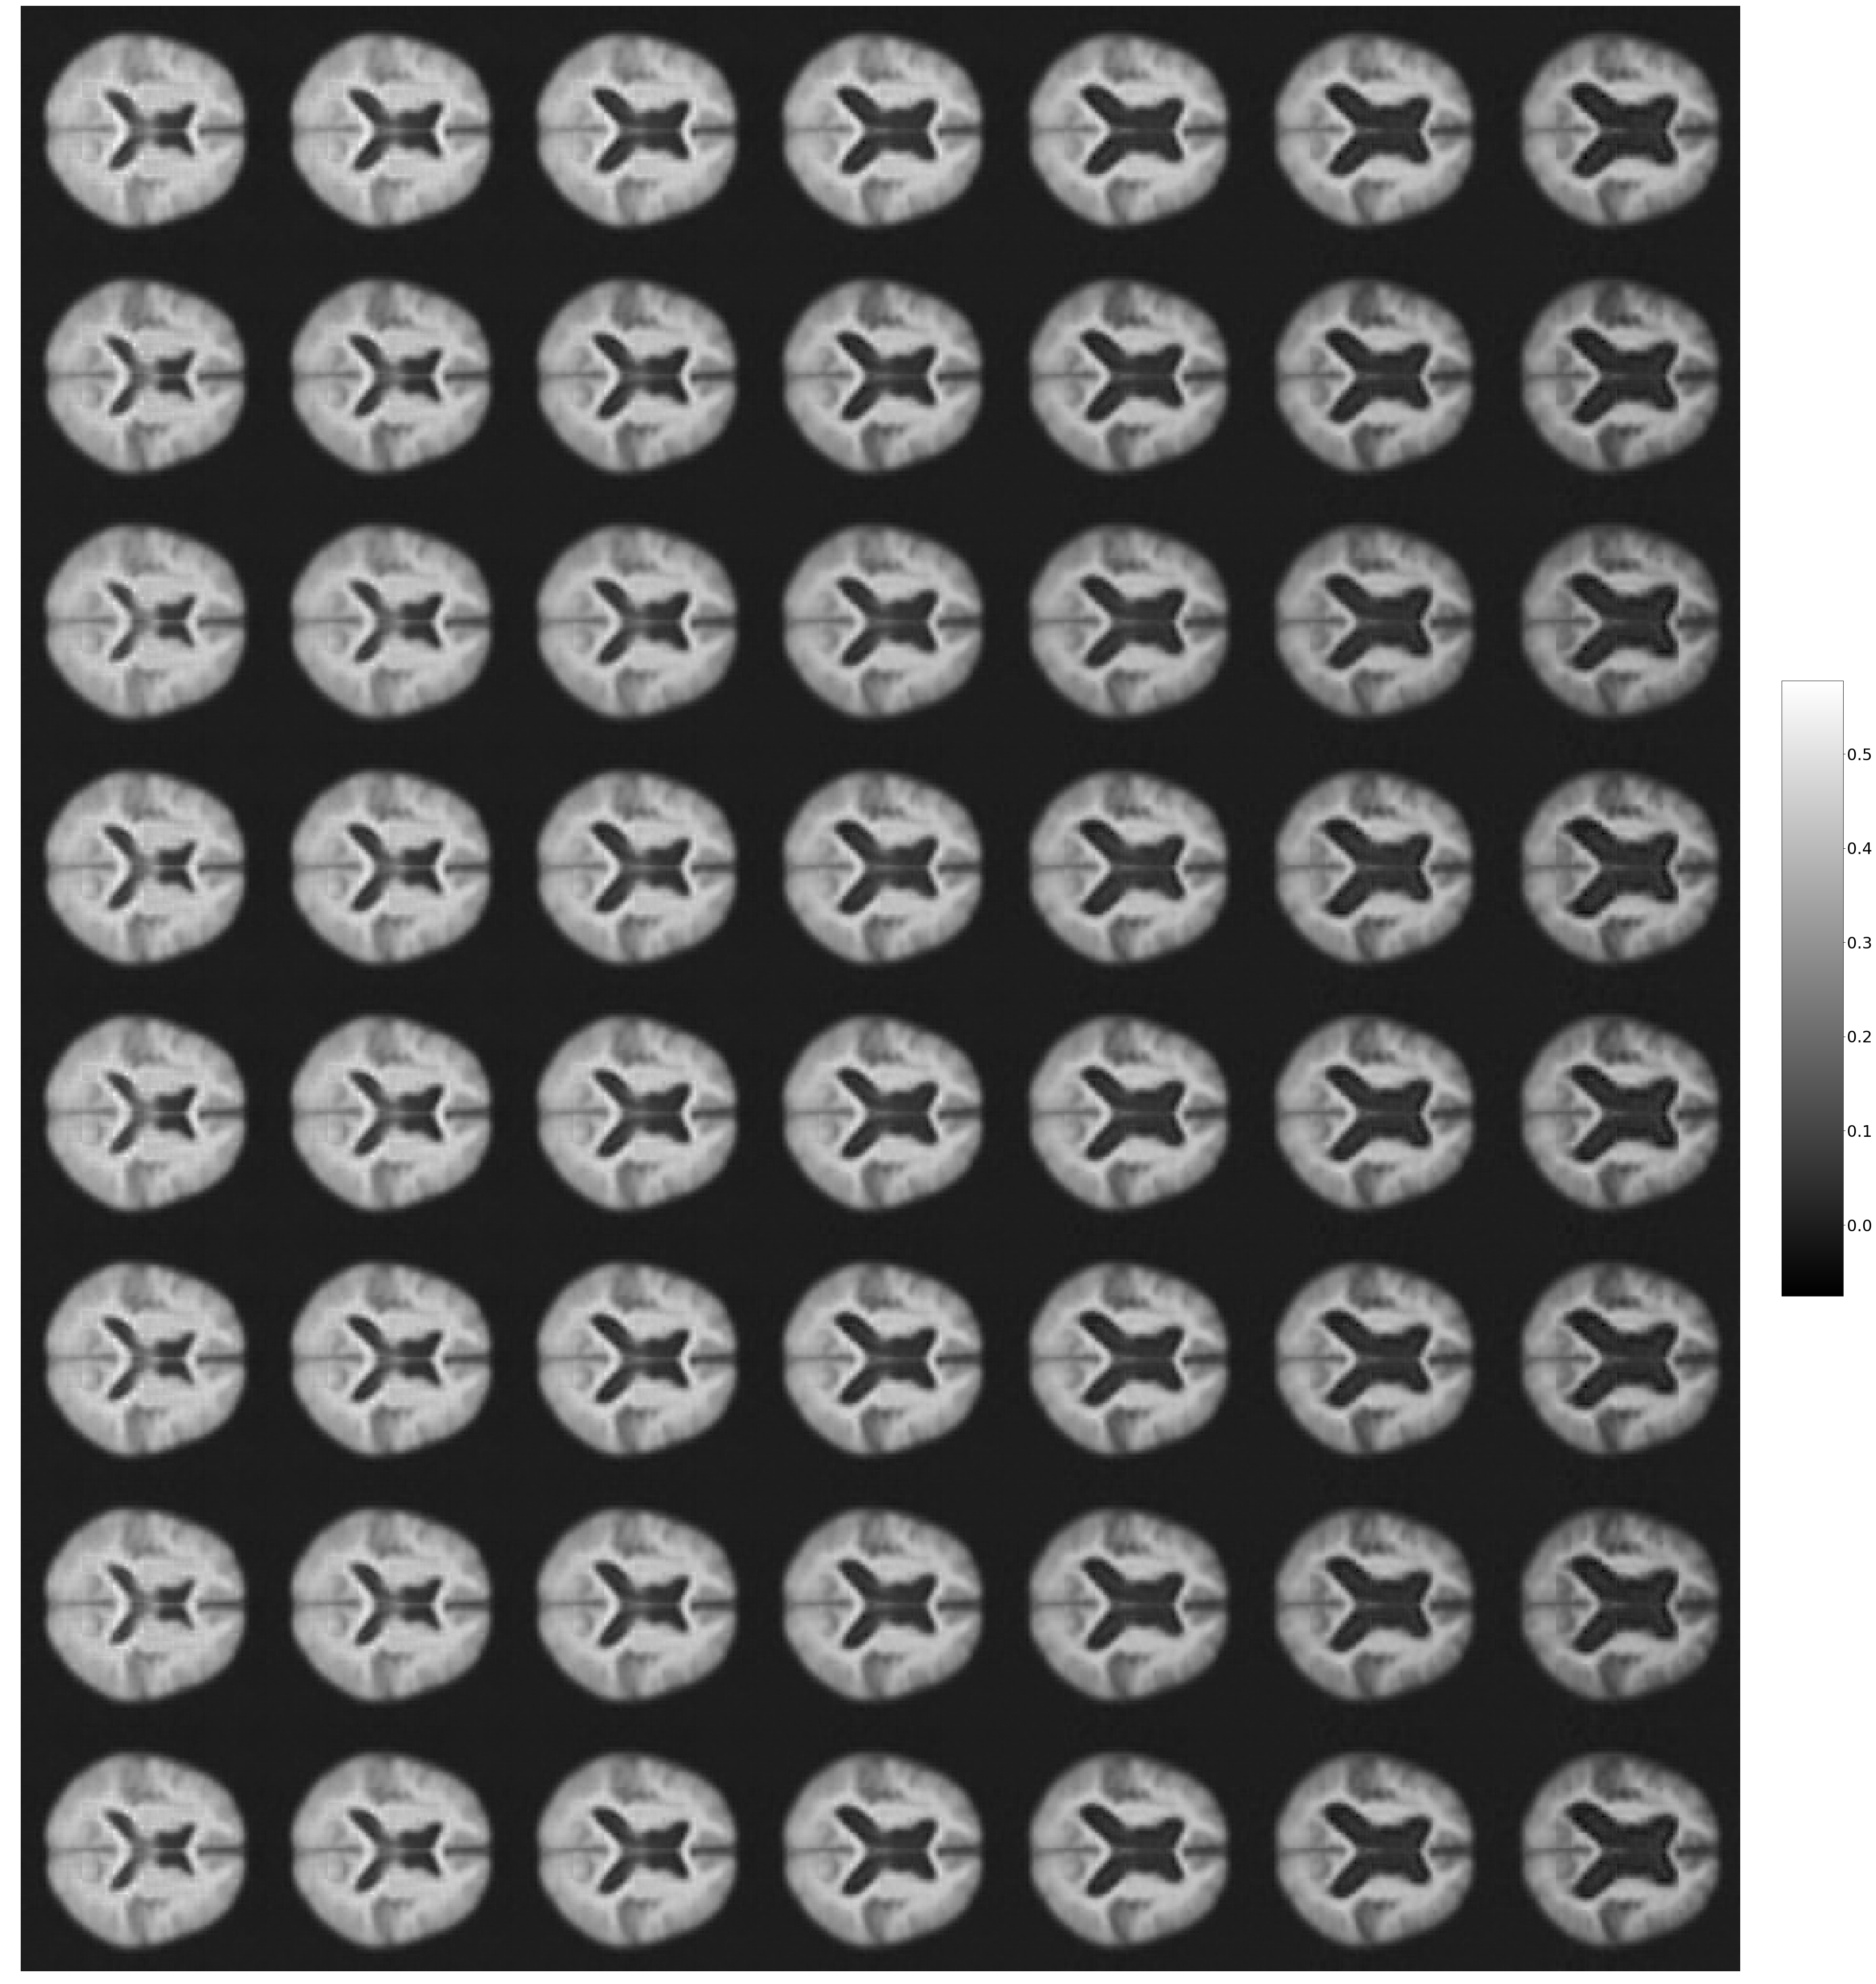

In [82]:
# Sources
sources_traj = []
for i in range(min(number_of_sources, 10)):
    source_folder = os.path.join(path_to_output[fold_to_plot], 'parallel_curve_neg_' + str(i))
    sources_traj.append(load_image_trajectory(source_folder))
plot_images(sources_traj, name='sources.pdf')
#print(len(sources_traj))
#for i in range(number_of_sources):
    #plot_images(sources_traj[i])

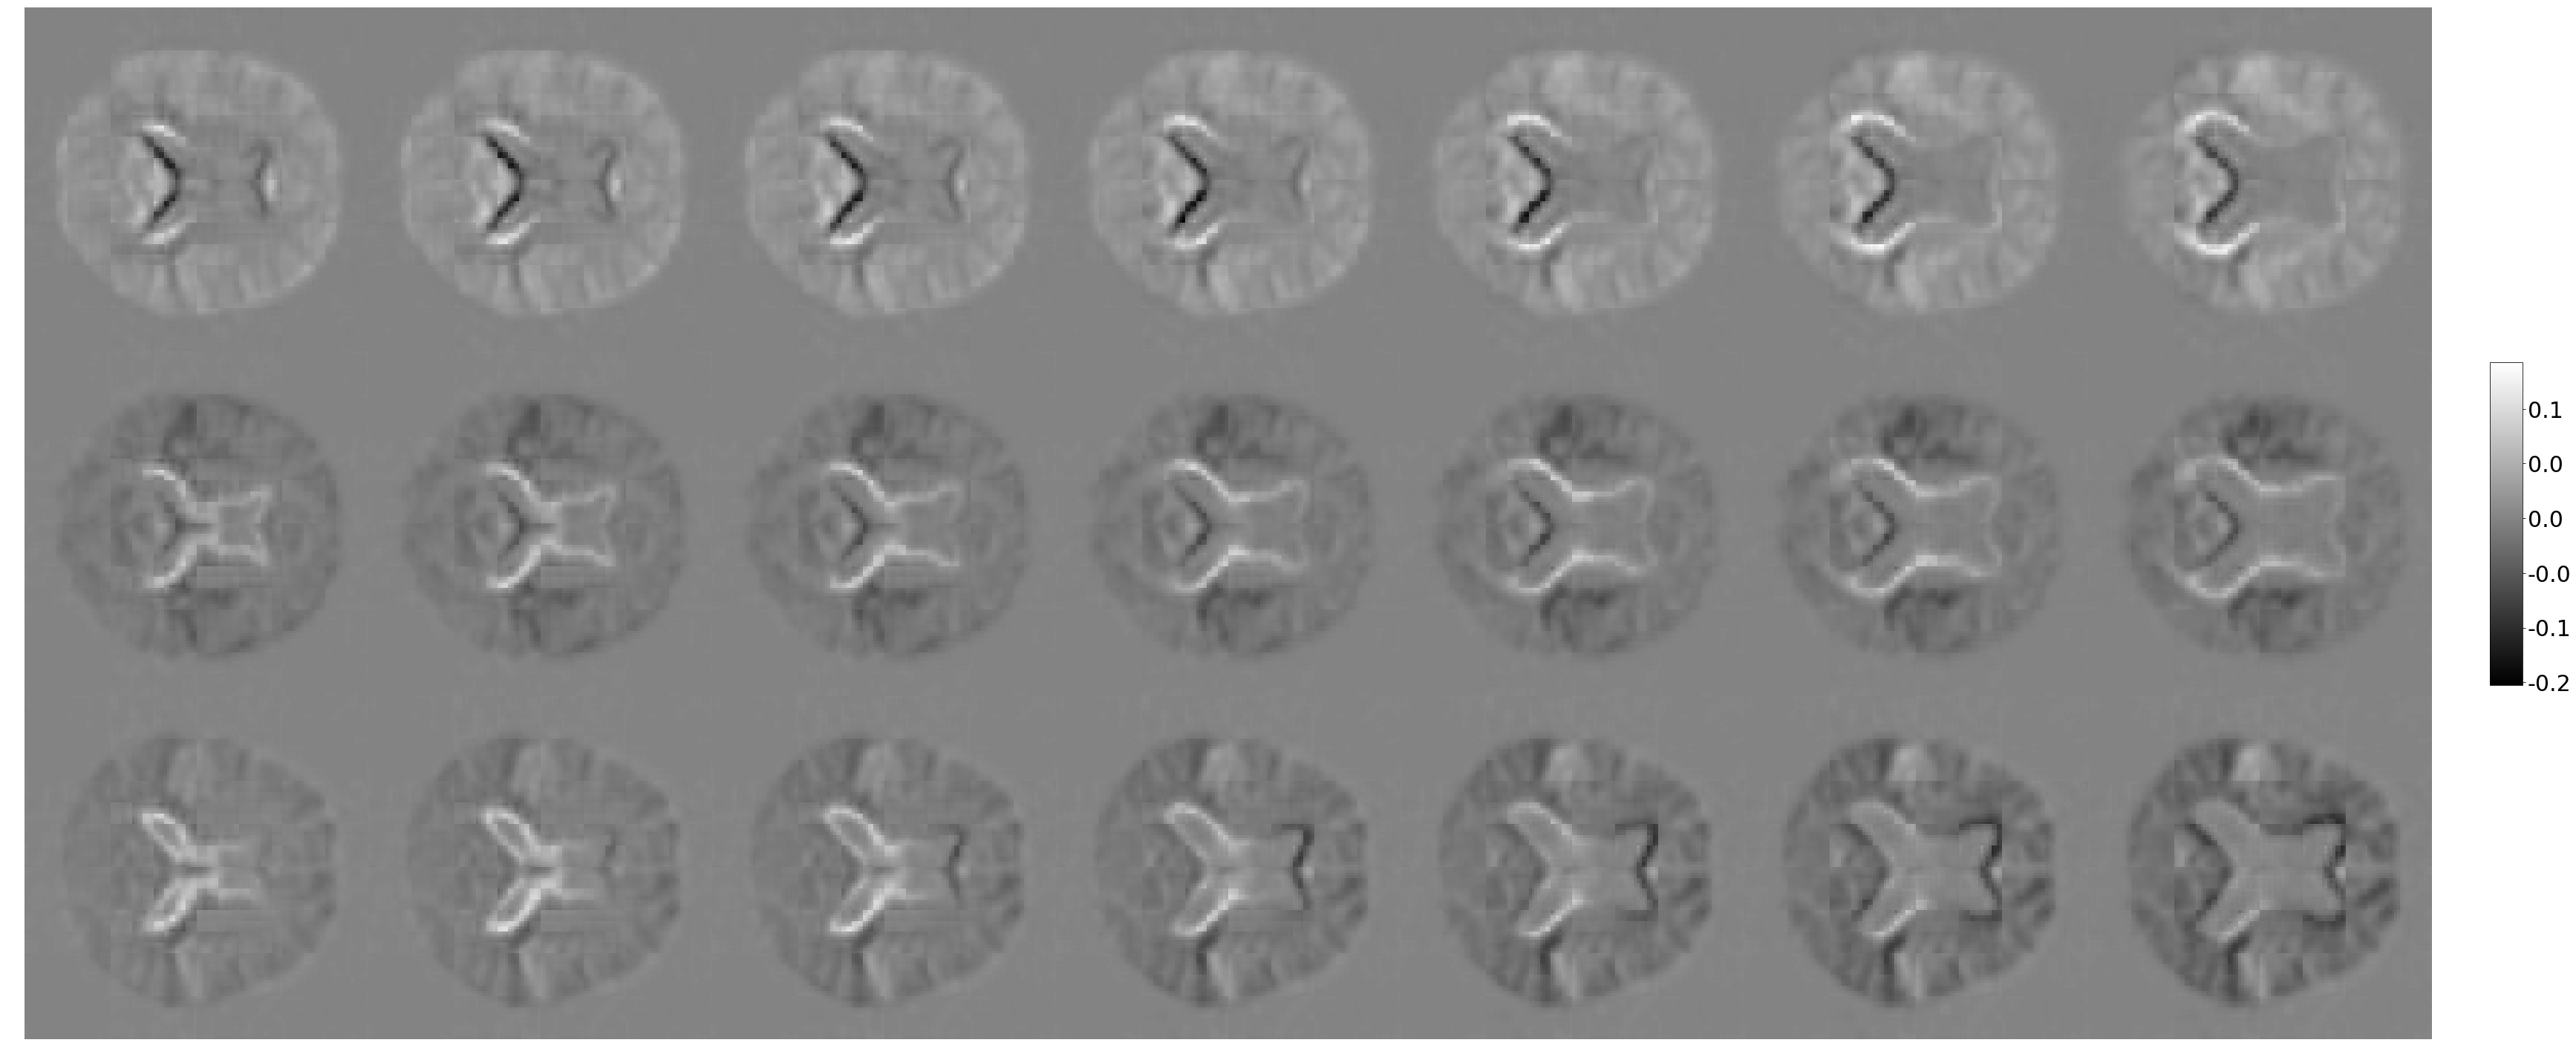

In [83]:
diff_sources_traj =[]
#diff_sources_traj.append(geodesic_images)
for i in range(min(number_of_sources, 3)):
    diff_sources_traj.append([sources_traj[i][j] - geodesic_images[j] for j in range(len(geodesic_images))])
plot_images(diff_sources_traj, name='sources_diff.pdf')

0


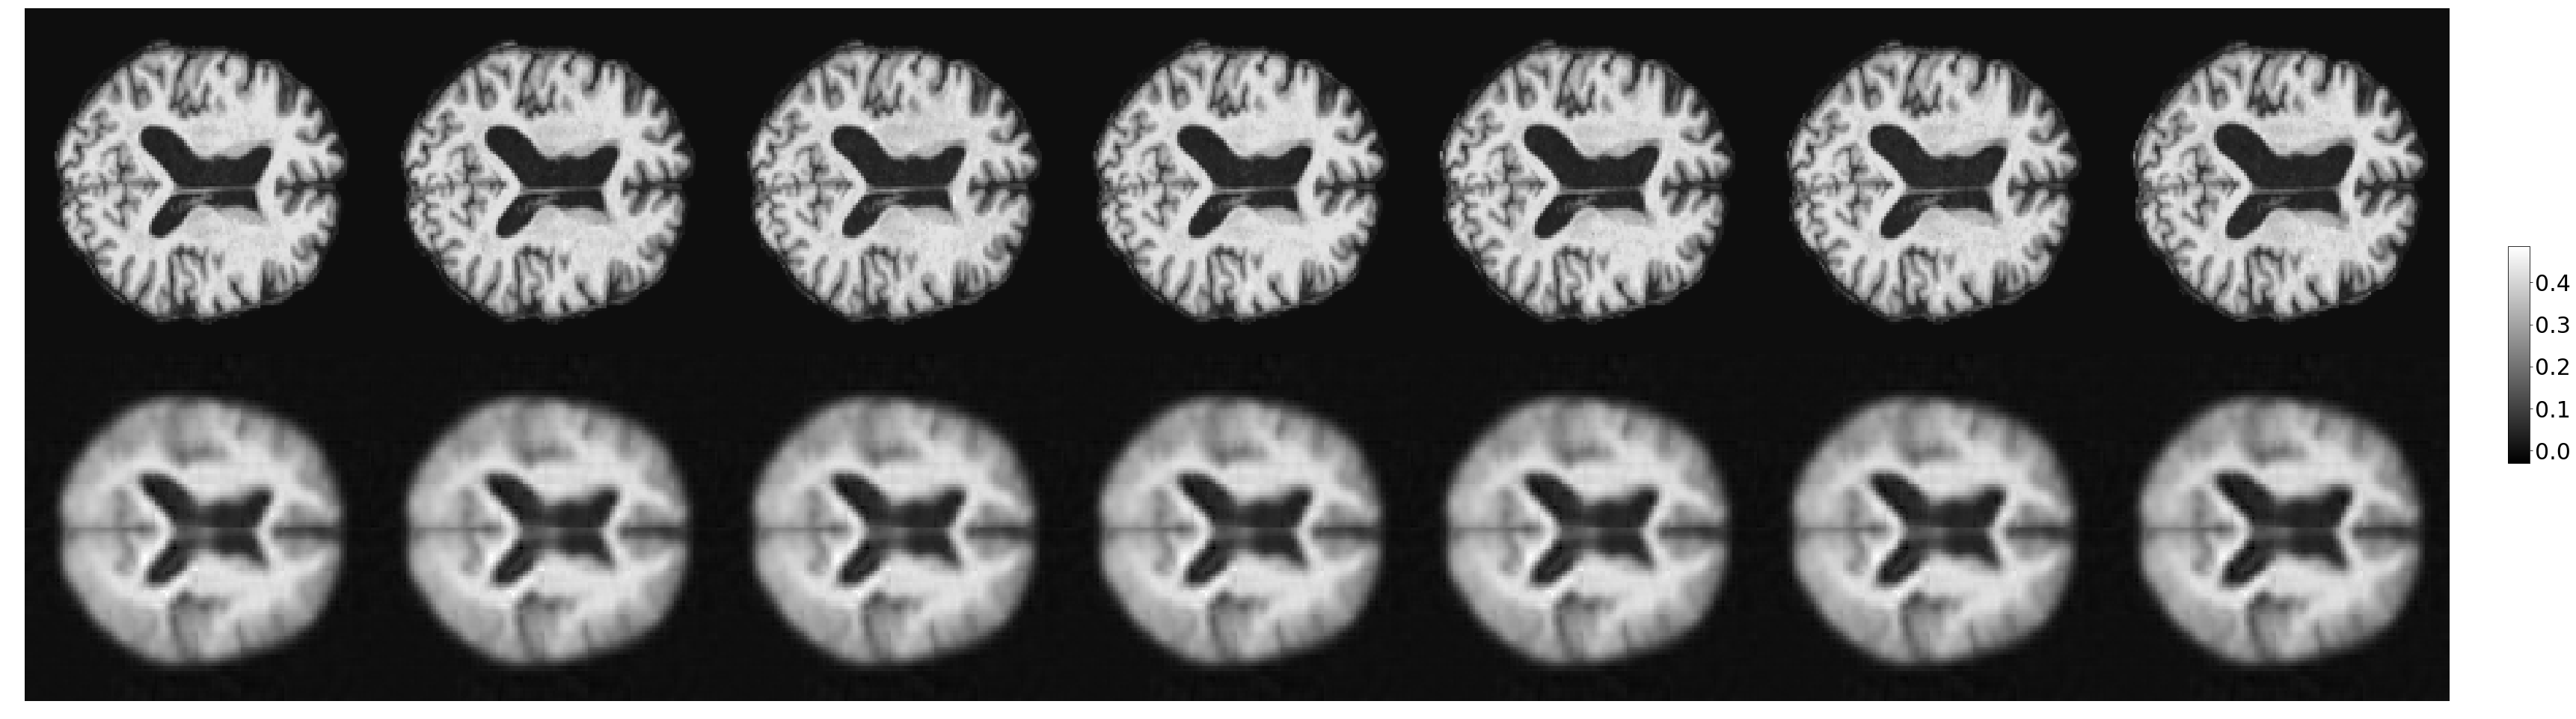

IndexError: list index out of range

In [84]:
def load_subject_images(i):
    for key in  xml_parameters.template_specifications.keys():
        object_name = key
        break
    subject_filenames = [elt[object_name] for elt in xml_parameters.dataset_filenames[i]]
    #print(subject_filenames)
    #data_dir = '/Users/maxime.louis/Documents/metric_learning/MRIs/'
    #data_dir = '/Users/maxime.louis/Documents/metric_learning/synthetic_image/synthetic_dataset'
    #subject_targets = [elt for elt in os.listdir(data_dir) if elt.find('al_'+str(i)+'_t_')>0]
    #sorted_targets = sorted(subject_filenames, key=(lambda x: float(x[x.find('_t_')+3 : x.find('.npy')])))
    #sorted_targets = sorted(subject_targets, key=(lambda x: float(x[x.find('_t_')+3 : x.find('.npy')])))
    #print([os.path.join(data_dir, elt) for elt in sorted_targets])
    return load_images([os.path.join(path_to_atlas[fold_to_plot], elt) for elt in subject_filenames])
    
def load_reconstructed_images(i):
    subject_folder = os.path.join(path_to_output[fold_to_plot], 'subject_'+str(i))
    paths = [elt for elt in os.listdir(subject_folder) if elt.find('.npy')>0]
    sorted_paths = sorted(paths, key=(lambda x: float(x[x.find('_t__')+4 : x.find('.npy')])))
    #print([os.path.join(subject_folder, elt) for elt in sorted_paths])
    return load_images([os.path.join(subject_folder, elt) for elt in sorted_paths])
    
for i in range(1):
    print(i)
    targets = np.array(load_subject_images(i))/255.
    reconstructed = load_reconstructed_images(i)
    residuals = np.array([targets[k] - reconstructed[k] for k in range(len(targets))])
    to_plot = []
    to_plot.append(targets)
    to_plot.append(reconstructed)
    #to_plot.append(residuals)
    plot_images(to_plot, 'subject_'+str(i)+'.pdf')
    #plt.plot(np.sum(np.sum(residuals**2, axis=2), axis=1)/np.sum(np.sum(targets**2, axis=2), axis=1))
    #plt.show()
    
i = 9
targets = np.array(load_subject_images(i))/255.
reconstructed = load_reconstructed_images(i)
residuals = np.array([targets[k] - reconstructed[k] for k in range(len(targets))])
to_keep = [0, 3, 6]
reconstructed = [reconstructed[tk] for tk in to_keep]
targets = [targets[tk] for tk in to_keep]
to_plot = []
to_plot.append(targets)
to_plot.append(reconstructed)
#to_plot.append(residuals)
plot_images(to_plot, 'subject_'+str(i)+'.pdf')
#plt.plot(np.sum(np.sum(residuals**2, axis=2), axis=1)/np.sum(np.sum(targets**2, axis=2), axis=1))

# Cognitive scores


159 4


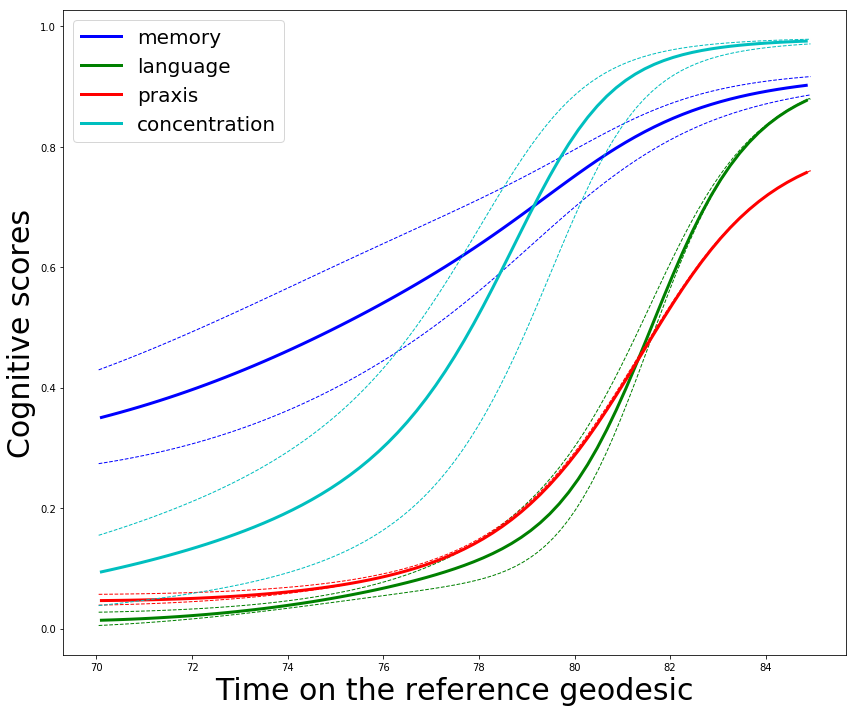

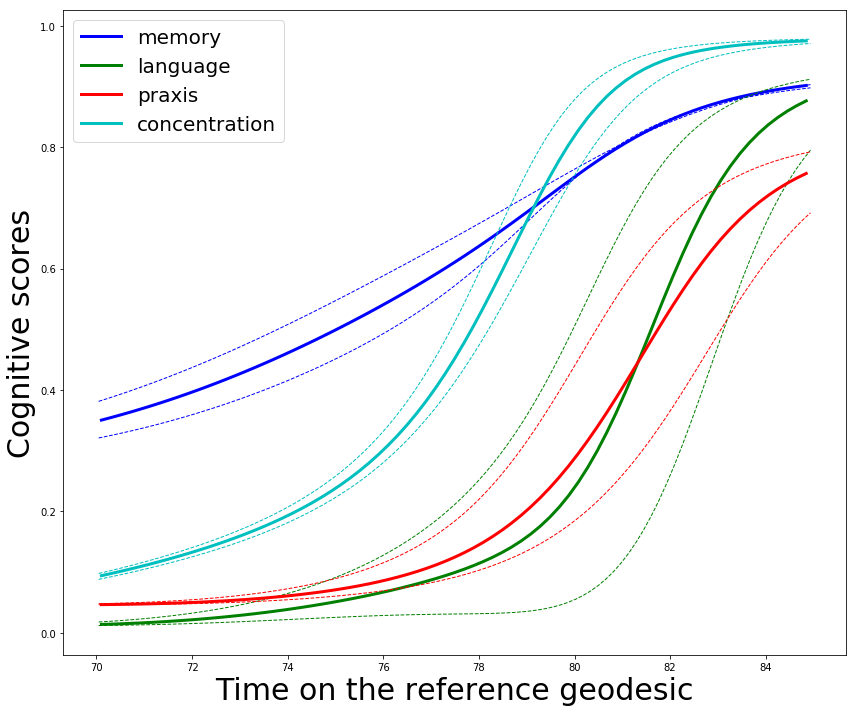

In [6]:
path_to_output = '/Users/maxime.louis/Documents/metric_learning/simulation_multivariate/deep/output'
geodesic_times = np.loadtxt(os.path.join(path_to_output, 'LongitudinalMetricModel_reference_geodesic_trajectory_times.txt'))
geodesic_values = np.loadtxt(os.path.join(path_to_output, 'LongitudinalMetricModel_reference_geodesic_trajectory_values.txt'))
a, d= geodesic_values.shape
print(a,d)

tmin = 70
tmax = 85
values, times = [], []
colors = ['b', 'g', 'r', 'c']
labels = ['memory', 'language', 'praxis', 'concentration'] 

for (t, val) in zip(geodesic_times, geodesic_values):
    if t >= tmin and t <= tmax:
        values.append(val)
        times.append(t)
        
for s in range(2):
    source_times = np.loadtxt(os.path.join(path_to_output, 'LongitudinalMetricModel_times_parallel_curves.txt'))
    source_neg = np.loadtxt(os.path.join(path_to_output, 'LongitudinalMetricModel_source_'+str(s)+'_neg.txt'))
    source_pos = np.loadtxt(os.path.join(path_to_output, 'LongitudinalMetricModel_source_'+str(s)+'_pos.txt'))
    #source_1_neg = np.loadtxt(os.path.join(path_to_output, 'LongitudinalMetricModel_source_1_neg.txt'))
    #source_1_pos = np.loadtxt(os.path.join(path_to_output, 'LongitudinalMetricModel_source_1_pos.txt'))

    sources_n, sources_p = [], []
    times_sources = []
    for (t, sn, sp) in zip(source_times, source_neg, source_pos):
        if t >= tmin and t <= 85:
            sources_n.append(sn)
            sources_p.append(sp)
            times_sources.append(t)

    sources_n = np.array(sources_n)
    sources_p = np.array(sources_p)
    values = np.array(values)
    plt.figure(figsize=(12, 10))


    for i in range(d):
        plt.plot(times, values[:,i], label=labels[i], c = colors[i], linewidth=3.)
        plt.plot(times_sources, sources_n[:,i], c=colors[i], linestyle='dashed', linewidth=1.)
        plt.plot(times_sources, sources_p[:,i], c=colors[i], linestyle='dashed', linewidth=1.)
        

    plt.legend(prop={'size': 20})
    plt.xlabel('Time on the reference geodesic', fontsize=30)
    plt.ylabel('Cognitive scores', fontsize=30)
    plt.tight_layout()
    plt.savefig(os.path.join('/Users/maxime.louis/Documents/metric_learning/MRIs/figures', 'cognitive_scores_avg_progression'+str(s)+'.pdf'), bbox_inches='tight', pad_inches=0)
    plt.show()

In [ ]:
# We build a tool to generate any image with given coordinates
from pydeformetrica.src.core.model_tools.manifolds.metric_learning_nets import ImageNet2d128

net = ImageNet2d128(in_dimension=number_of_sources+1)
nn_parameters = Variable(torch.from_numpy(np.loadtxt(os.path.join(path_to_output[fold_to_plot], 'LongitudinalMetricModel_metric_parameters.txt'))))
net.set_parameters(nn_parameters)
v0 = np.loadtxt(os.path.join(path_to_output[fold_to_plot], 'LongitudinalMetricModel_v0.txt'))
p0 = np.loadtxt(os.path.join(path_to_output[fold_to_plot], 'LongitudinalMetricModel_p0.txt'))
modulation_matrix = np.loadtxt(os.path.join(path_to_output[fold_to_plot], 'LongitudinalMetricModel_modulation_matrix.txt'))

time = 0
sources = np.zeros(number_of_sources)
print('Latent space dimension', number_of_sources)
print(v0.shape, p0.shape, modulation_matrix.shape)

def get_image(time, source):
    latent_space_position = np.array([v0 * time + p0 + np.matmul(modulation_matrix, source)]) 
    latent_space_position_torch = Variable(torch.from_numpy(latent_space_position))
    print(latent_space_position)
    out_torch = net(latent_space_position_torch)
    out_np = out_torch.data.numpy()[0]
    return out_np

def plot_diff_along_direction(s):
    images = []
    for t in np.linspace(0., 10., 5):
        source = t*s
        #print(source)
        images.append(get_image(0, source))

    diffs = [elt - images[0] for elt in images]
    plot_images(images)
    plot_images(diffs)
#img = get_image(0., sources)
#plt.imshow(img, cmap='gray')
#plt.show()

#Discriminative direction for the gender:
print('Men vs women:')
s = np.array([0.03349977, -0.0999715, -0.11167578, 0.15413056])
plot_diff_along_direction(s)


#Discriminative direction for the gender:
print('High vs Low education:')
s = np.array([0.11584864, 0.01144031, 0.19607944, -0.22745281])
plot_diff_along_direction(s)
